In [124]:
# environment should be name as "movie_recommender"


In [125]:
import numpy as np
import pandas as pd


In [126]:
df = pd.read_csv('spam.csv', encoding='ISO-8859-1')
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
1686,spam,todays vodafone numbers ending with 0089(my la...,NaN,NaN,NaN
2532,ham,Yup ok...,NaN,NaN,NaN
3788,ham,Are you sure you don't mean \get here,"we made you hold all the weed\""""",NaN,NaN
2489,ham,I have 2 docs appointments next week.:/ I'm ti...,NaN,NaN,NaN
1781,ham,";-( oh well, c u later",NaN,NaN,NaN


In [127]:
df.shape

(5572, 5)

In [128]:
#steps for project :
#step 1: Data cleaning
#step 2: EDA
#step 3: Text preprocessing
#step 4: Model creation
#step 5: evaluation
#step 6: Improvement
#step 7: website


In [129]:
#step 1: Data cleaning
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [130]:
#drop last 3 columns 
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [131]:
df.head(5)

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [132]:
df.rename(columns={'v1':'target','v2':'text'},inplace=True)
df.head()

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [133]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()

In [134]:
df['target']=encoder.fit_transform(df['target'])

In [135]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [136]:
df.isnull().sum()

target    0
text      0
dtype: int64

In [137]:
df.duplicated().sum()

np.int64(403)

In [138]:
df=df.drop_duplicates(keep='first')
df

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will Ì_ b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


In [139]:
df.shape

(5169, 2)

In [140]:
#step 2: EDA
df['target'].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

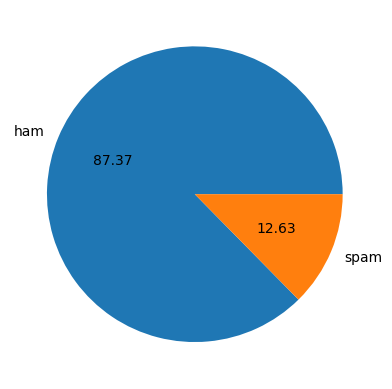

In [141]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(),labels=['ham','spam'],autopct="%0.2f")
plt.show()


In [142]:
# Data is imbalance
from imblearn.over_sampling import RandomOverSampler
import pandas as pd

# Assuming your dataset is stored in a DataFrame 'df'
# 'text' column contains the messages, 'target' column contains the labels (ham/spam)

# Separate features and target
X = df['text'].values.reshape(-1, 1)  # Reshaping because RandomOverSampler expects 2D array
y = df['target'].values

# Initialize the RandomOverSampler
ros = RandomOverSampler(sampling_strategy='auto', random_state=42)

# Apply the oversampling
X_resampled, y_resampled = ros.fit_resample(X, y)

# Convert back to DataFrame
df_resampled = pd.DataFrame({
    'text': X_resampled.flatten(),  # Flattening to 1D array
    'target': y_resampled
})

# Check the class distribution after oversampling
print(df_resampled['target'].value_counts())


target
0    4516
1    4516
Name: count, dtype: int64


In [143]:
df_resampled


,text,target
0,"Go until jurong point, crazy.. Available only ...",0
1,Ok lar... Joking wif u oni...,0
2,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,U dun say so early hor... U c already then say...,0
4,"Nah I don't think he goes to usf, he lives aro...",0
...,...,...
9027,You have WON a guaranteed å£1000 cash or a å£2...,1
9028,1000's flirting NOW! Txt GIRL or BLOKE & ur NA...,1
9029,it to 80488. Your 500 free text messages are v...,1
9030,from www.Applausestore.com MonthlySubscription...,1


In [144]:
df_resampled['text'] = df_resampled['text'].str.lower()

df_resampled

,text,target
0,"go until jurong point, crazy.. available only ...",0
1,ok lar... joking wif u oni...,0
2,free entry in 2 a wkly comp to win fa cup fina...,1
3,u dun say so early hor... u c already then say...,0
4,"nah i don't think he goes to usf, he lives aro...",0
...,...,...
9027,you have won a guaranteed å£1000 cash or a å£2...,1
9028,1000's flirting now! txt girl or bloke & ur na...,1
9029,it to 80488. your 500 free text messages are v...,1
9030,from www.applausestore.com monthlysubscription...,1


In [145]:
#Removing Punctuation and Special Characters
df_resampled['text'] = df_resampled['text'].str.replace(r'[^\w\s]', '', regex=True)


In [146]:
#stopwords (e.g., "and", "the", "is") are common words that often don't add significant value in determining the context.
#  You can remove them using libraries like NLTK or SpaCy.
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

df_resampled['text'] = df_resampled['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in stop_words]))



[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Dell\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [147]:
# Tokenization
df_resampled['tokens'] = df_resampled['text'].apply(lambda x: x.split())


In [148]:
# Stemming or Lemmatization:
# Stemming: Reduces words to their root form (e.g., "running" -> "run").
# Lemmatization: Similar to stemming but more context-aware (e.g., "better" -> "good").
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
lemmatizer = WordNetLemmatizer()

df_resampled['text'] = df_resampled['text'].apply(lambda x: ' '.join([lemmatizer.lemmatize(word) for word in x.split()]))


[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Dell\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [149]:
# Text Vectorization:
# Convert the cleaned text into numerical features that can be fed into a machine learning model. Common methods include:

# Bag of Words (BoW): Counts word occurrences.
# TF-IDF (Term Frequency-Inverse Document Frequency): Weighs words by importance.
# Word Embeddings: Such as Word2Vec, GloVe, or using pre-trained embeddings like BERT.
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features=5000)
X = vectorizer.fit_transform(df_resampled['text'])


In [150]:
# Splitting the Dataset:
# Divide the dataset into training and testing sets.
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, df_resampled['target'], test_size=0.2, random_state=42)


In [151]:
# model 1 : Naive Bayes Classifiers

from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [152]:
# Initialize the Multinomial Naive Bayes model
nb_model = MultinomialNB()

# Train the model on the training data
nb_model.fit(X_train, y_train)


MultinomialNB()

In [153]:
# Make predictions on the test data
y_pred = nb_model.predict(X_test)


              precision    recall  f1-score   support

           0       0.96      0.98      0.97       884
           1       0.98      0.96      0.97       923

    accuracy                           0.97      1807
   macro avg       0.97      0.97      0.97      1807
weighted avg       0.97      0.97      0.97      1807

Accuracy: 0.9734366353071389


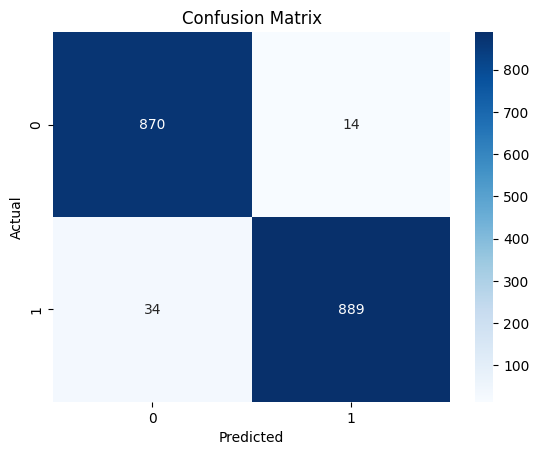

In [154]:
# Print the classification report
print(classification_report(y_test, y_pred))

# Print the accuracy score
print("Accuracy:", accuracy_score(y_test, y_pred))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [155]:
from sklearn.metrics import roc_auc_score, roc_curve
# Get the predicted probabilities for the positive class (spam)
y_prob = nb_model.predict_proba(X_test)[:, 1]

In [156]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Accuracy
nb_accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", nb_accuracy)

# Precision
nb_precision = precision_score(y_test, y_pred)
print("Precision:", nb_precision)

# Recall
nb_recall = recall_score(y_test, y_pred)
print("Recall (Sensitivity):", nb_recall)

# F1-Score
nb_f1 = f1_score(y_test, y_pred)
print("F1-Score:", nb_f1)

# ROC-AUC
nb_roc_auc = roc_auc_score(y_test, y_prob)
print("ROC-AUC:", nb_roc_auc)


Accuracy: 0.9734366353071389
Precision: 0.9844961240310077
Recall (Sensitivity): 0.9631635969664138
F1-Score: 0.9737130339539978
ROC-AUC: 0.9966185907649168


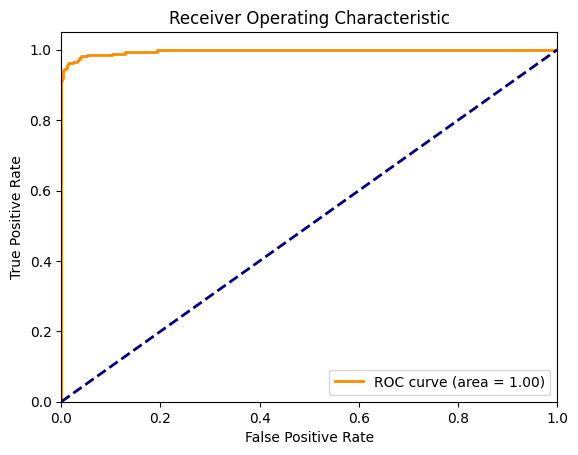

In [157]:
# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_prob)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [158]:
# model 2: SVM
from sklearn.svm import SVC



In [159]:
# Initialize the SVM model with a linear kernel
svm_model = SVC(kernel='linear', probability=True, random_state=42)

# Train the model on the training data
svm_model.fit(X_train, y_train)


SVC(kernel='linear', probability=True, random_state=42)

In [160]:
# Make predictions on the test data
y_pred = svm_model.predict(X_test)

# Get the predicted probabilities for the positive class (spam)
y_prob = svm_model.predict_proba(X_test)[:, 1]


In [161]:
# Accuracy
svm_accuracy = accuracy_score(y_test, y_pred)
print("svm_Accuracy:", svm_accuracy)

# Precision
svm_precision = precision_score(y_test, y_pred)
print("svm_Precision:", svm_precision)

# Recall
svm_recall = recall_score(y_test, y_pred)
print("svm_Recall (Sensitivity):", svm_recall)

# F1-Score
svm_f1 = f1_score(y_test, y_pred)
print("svm_F1-Score:", svm_f1)

# ROC-AUC
svm_roc_auc = roc_auc_score(y_test, y_prob)
print("svm_ROC-AUC:", svm_roc_auc)


svm_Accuracy: 0.9988931931377975
svm_Precision: 0.9978378378378379
svm_Recall (Sensitivity): 1.0
svm_F1-Score: 0.9989177489177489
svm_ROC-AUC: 0.9999852928920547


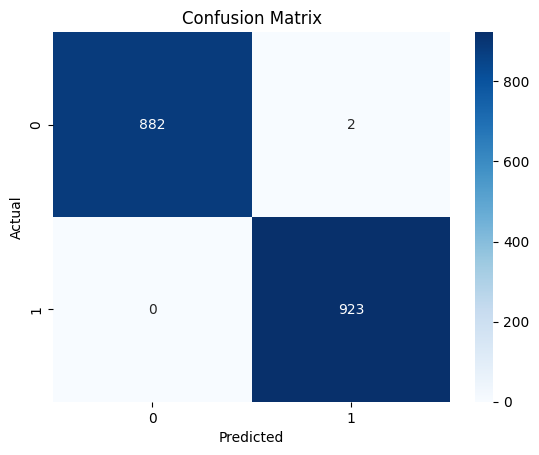

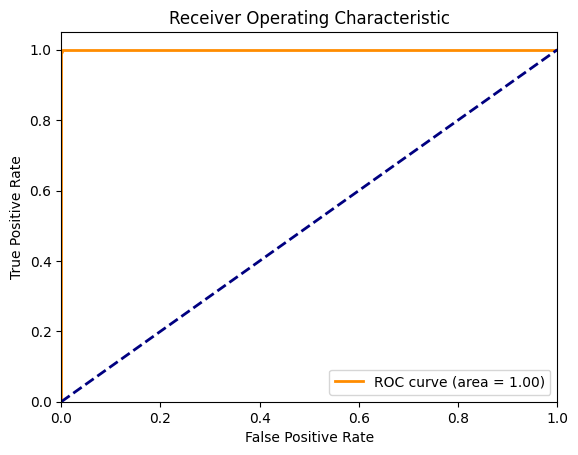

In [162]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_prob)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


In [163]:
# model 3: Logistic Regression
from sklearn.linear_model import LogisticRegression

In [164]:
# Initialize the Logistic Regression model
logreg_model = LogisticRegression(random_state=42)

# Train the model on the training data
logreg_model.fit(X_train, y_train)


LogisticRegression(random_state=42)

In [165]:
# Make predictions on the test data
y_pred = logreg_model.predict(X_test)

# Get the predicted probabilities for the positive class (spam)
y_prob = logreg_model.predict_proba(X_test)[:, 1]


In [166]:
# Accuracy
logreg_accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", logreg_accuracy)

# Precision
logreg_precision = precision_score(y_test, y_pred)
print("Precision:", logreg_precision)

# Recall
logreg_recall = recall_score(y_test, y_pred)
print("Recall (Sensitivity):", logreg_recall)

# F1-Score
logreg_f1 = f1_score(y_test, y_pred)
print("F1-Score:", logreg_f1)

# ROC-AUC
logreg_roc_auc = roc_auc_score(y_test, y_prob)
print("ROC-AUC:", logreg_roc_auc)


Accuracy: 0.9800774764803541
Precision: 0.9857612267250822
Recall (Sensitivity): 0.9750812567713976
F1-Score: 0.9803921568627451
ROC-AUC: 0.99775348926136



Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.99      0.98       884
           1       0.99      0.98      0.98       923

    accuracy                           0.98      1807
   macro avg       0.98      0.98      0.98      1807
weighted avg       0.98      0.98      0.98      1807



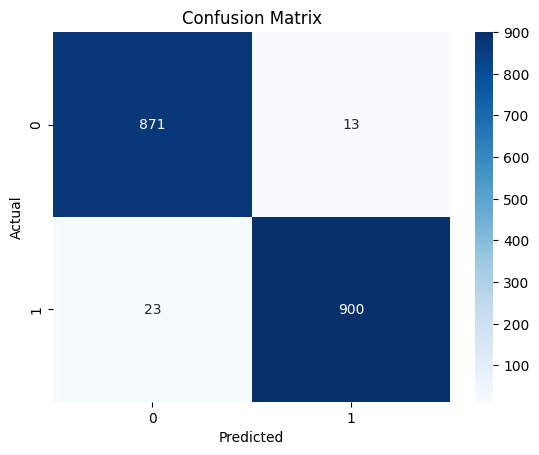

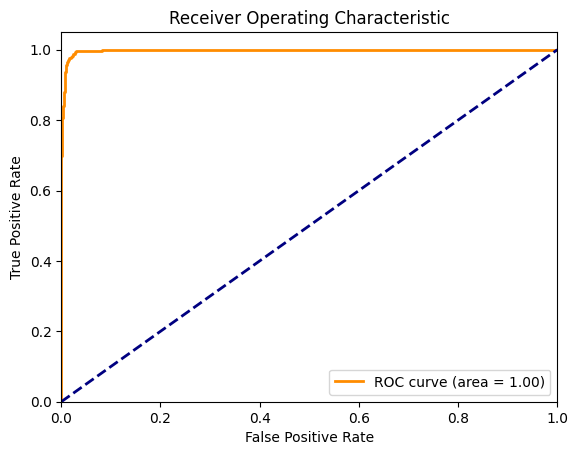

In [167]:

# Classification report
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_prob)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [168]:
#model 4: Random Forest
from sklearn.ensemble import RandomForestClassifier

In [169]:
# Initialize the Random Forest model
rf_model = RandomForestClassifier(random_state=42)

# Train the model on the training data
rf_model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [170]:
# Make predictions on the test data
y_pred = rf_model.predict(X_test)

# Get the predicted probabilities for the positive class (spam)
y_prob = rf_model.predict_proba(X_test)[:, 1]


In [171]:
# Accuracy
rf_accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", rf_accuracy)

# Precision
rf_precision = precision_score(y_test, y_pred)
print("Precision:", rf_precision)

# Recall
rf_recall = recall_score(y_test, y_pred)
print("Recall (Sensitivity):", rf_recall)

# F1-Score
rf_f1 = f1_score(y_test, y_pred)
print("F1-Score:", rf_f1)

# ROC-AUC
rf_roc_auc = roc_auc_score(y_test, y_prob)
print("ROC-AUC:", rf_roc_auc)


Accuracy: 0.9988931931377975
Precision: 0.9978378378378379
Recall (Sensitivity): 1.0
F1-Score: 0.9989177489177489
ROC-AUC: 1.0


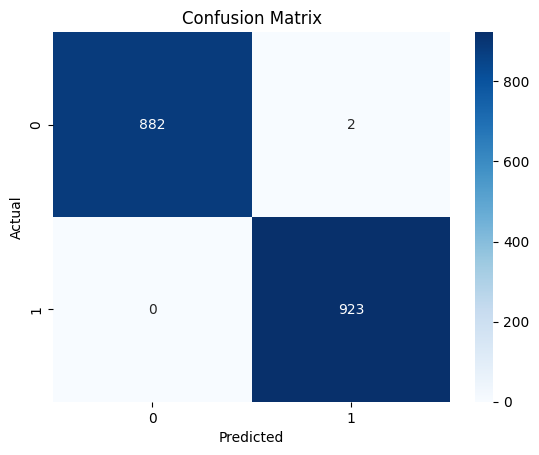

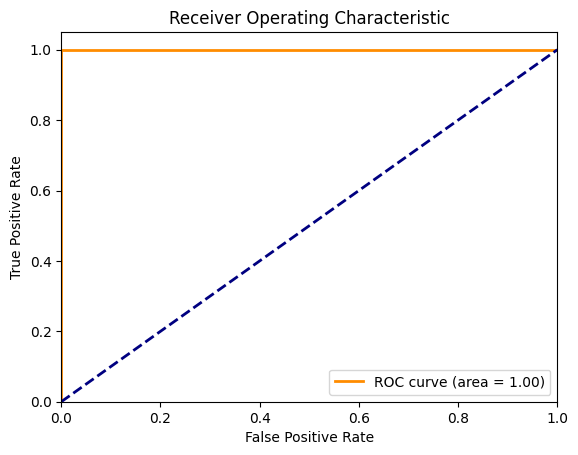

In [172]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_prob)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


In [173]:
# model 5: XGBoost
import xgboost as xgb

In [174]:
# Initialize the XGBoost model
xgb_model = xgb.XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')

# Train the model on the training data
xgb_model.fit(X_train, y_train)


c:\Users\Dell\anaconda3\envs\movie_recommender\Lib\site-packages\xgboost\core.py:158: UserWarning: [18:37:40] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=42, ...)

In [175]:
# Make predictions on the test data
y_pred = xgb_model.predict(X_test)

# Get the predicted probabilities for the positive class (spam)
y_prob = xgb_model.predict_proba(X_test)[:, 1]


In [176]:
# Accuracy
xgb_accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", xgb_accuracy)

# Precision
xgb_precision = precision_score(y_test, y_pred)
print("Precision:", xgb_precision)

# Recall
xgb_recall = recall_score(y_test, y_pred)
print("Recall (Sensitivity):", xgb_recall)

# F1-Score
xgb_f1 = f1_score(y_test, y_pred)
print("F1-Score:", xgb_f1)

# ROC-AUC
xgb_roc_auc = roc_auc_score(y_test, y_prob)
print("ROC-AUC:", xgb_roc_auc)


Accuracy: 0.9800774764803541
Precision: 0.9784250269687162
Recall (Sensitivity): 0.9826652221018418
F1-Score: 0.9805405405405405
ROC-AUC: 0.9970438713030007


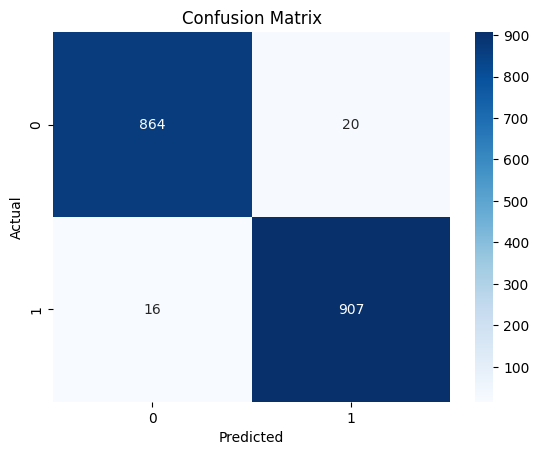

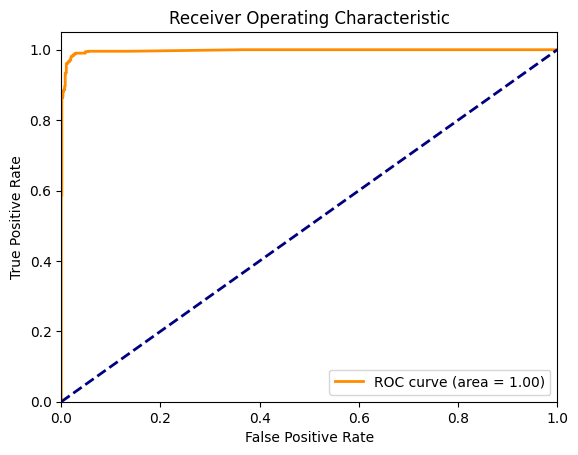

In [177]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_prob)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


In [178]:
import pandas as pd

# Initialize a dictionary to store the metrics for each model
model_metrics = {
    'Model': ['nb_model', 'SVM', 'logreg_model', 'rf_model', 'xgb_model'],
    'Accuracy': [nb_accuracy, svm_accuracy, logreg_accuracy, rf_accuracy, xgb_accuracy],
    'Precision': [nb_precision, svm_precision, logreg_precision, rf_precision, xgb_precision],
    'Recall': [nb_recall, svm_recall, logreg_recall, rf_recall, xgb_recall],
    'F1-Score': [nb_f1, svm_f1, logreg_f1, rf_f1, xgb_f1],
    'ROC-AUC': [nb_roc_auc, svm_roc_auc, logreg_roc_auc, rf_roc_auc, xgb_roc_auc]
}

# Convert the dictionary into a DataFrame for better visualization
metrics_df = pd.DataFrame(model_metrics)

# Display the DataFrame
print(metrics_df)


          Model  Accuracy  Precision    Recall  F1-Score   ROC-AUC
0      nb_model  0.973437   0.984496  0.963164  0.973713  0.996619
1           SVM  0.998893   0.997838  1.000000  0.998918  0.999985
2  logreg_model  0.980077   0.985761  0.975081  0.980392  0.997753
3      rf_model  0.998893   0.997838  1.000000  0.998918  1.000000
4     xgb_model  0.980077   0.978425  0.982665  0.980541  0.997044


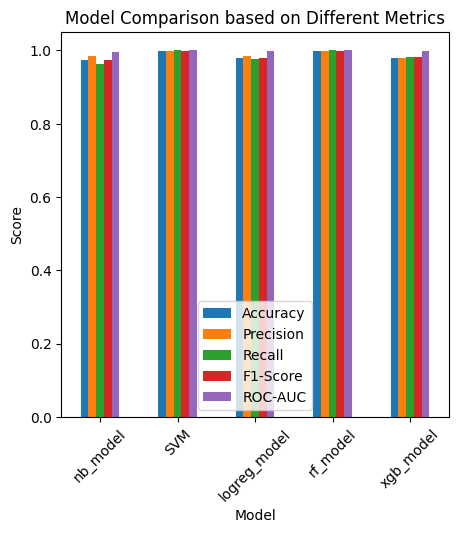

In [181]:
import matplotlib.pyplot as plt

# Plot the comparison of models based on the metrics
metrics_df.set_index('Model').plot(kind='bar', figsize=(5, 5))
plt.title('Model Comparison based on Different Metrics')
plt.ylabel('Score')
plt.xticks(rotation=45)
plt.show()


In [184]:
# lets check our all models by testing it some sms 

import joblib  # For loading the models



In [183]:
# Save models and vectorizer
joblib.dump(vectorizer, 'vectorizer.pkl')
joblib.dump(nb_model, 'nb_model.pkl')
joblib.dump(svm_model, 'svm_model.pkl')
joblib.dump(logreg_model, 'logreg_model.pkl')
joblib.dump(rf_model, 'rf_model.pkl')
joblib.dump(xgb_model, 'xgb_model.pkl')

['xgb_model.pkl']

In [185]:

# Load the vectorizer and models (you should have saved these after training)
vectorizer = joblib.load('vectorizer.pkl')
nb_model = joblib.load('nb_model.pkl')
svm_model = joblib.load('svm_model.pkl')
logreg_model = joblib.load('logreg_model.pkl')
rf_model = joblib.load('rf_model.pkl')
xgb_model = joblib.load('xgb_model.pkl')

def predict_spam_or_ham(email_text):
    # Step 1: Preprocess the email text (e.g., convert to vector using the same vectorizer)
    email_vector = vectorizer.transform([email_text])
    
    # Step 2: Predict with each model
    nb_prediction = nb_model.predict(email_vector)
    svm_prediction = svm_model.predict(email_vector)
    logreg_prediction = logreg_model.predict(email_vector)
    rf_prediction = rf_model.predict(email_vector)
    xgb_prediction = xgb_model.predict(email_vector)
    
    # Step 3: Convert numeric predictions to human-readable labels (assuming 1 = spam, 0 = ham)
    label_map = {1: 'Spam', 0: 'Ham'}
    results = {
        'Naive Bayes': label_map[nb_prediction[0]],
        'SVM': label_map[svm_prediction[0]],
        'Logistic Regression': label_map[logreg_prediction[0]],
        'Random Forest': label_map[rf_prediction[0]],
        'XGBoost': label_map[xgb_prediction[0]]
    }
    
    # Step 4: Print or return the results
    return results

# Example usage
sms = "Congratulations! You've won a free iPhone. Claim your prize now."
predictions = predict_spam_or_ham(sms)
print(predictions)


{'Naive Bayes': 'Spam', 'SVM': 'Spam', 'Logistic Regression': 'Spam', 'Random Forest': 'Spam', 'XGBoost': 'Spam'}
